In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
img_path = '/content/drive/MyDrive/Bacterial leaf blight/DSC_0366.jpg'
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)


In [5]:
model = InceptionV3(weights='imagenet', include_top=True)
model.summary()


96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [6]:
preds = model.predict(img_array)
class_idx = np.argmax(preds[0])
print("Predicted class:", class_idx)

# Find the layer named "mixed10" (the last conv layer in InceptionV3) for Grad-CAM
last_conv_layer = model.get_layer("mixed10")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class: 939


In [9]:
def get_gradcam_heatmap(img_array, model, last_conv_layer, pred_index=None):
    # Create a model that maps the input image to the activations of the last conv layer and the output
    grad_model = Model([model.inputs], [last_conv_layer.output, model.output])

    # Record operations for automatic differentiation
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Compute the gradients of the class output value with respect to the feature map
    grads = tape.gradient(class_channel, conv_outputs)

    # Pool the gradients across the channels
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weigh the feature map by the pooled gradients
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Apply ReLU to the heatmap (setting negative values to 0)
    heatmap = np.maximum(heatmap, 0)

    # Normalize the heatmap to the range [0, 1]
    heatmap /= np.max(heatmap)

    # Convert heatmap to numpy array if it's still a tensor
    if isinstance(heatmap, tf.Tensor):
        heatmap = heatmap.numpy()

    return heatmap


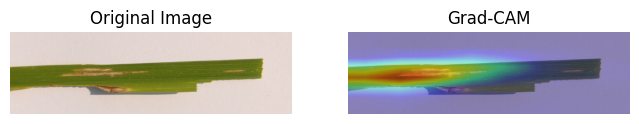

In [10]:
# Generate Grad-CAM heatmap
heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer)

# Display the heatmap on top of the original image
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    # Plot the result
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()

display_gradcam(img_path, heatmap)


In [11]:
img_path = '/content/drive/MyDrive/Brown spot/DSC_0101.jpg'
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)


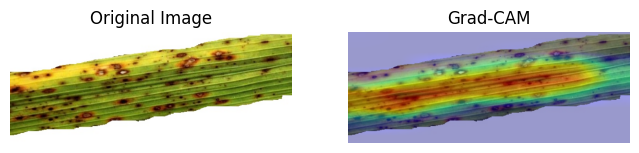

In [13]:
# Generate Grad-CAM heatmap
heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer)

# Display the heatmap on top of the original image
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    # Plot the result
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()

display_gradcam(img_path, heatmap)


In [15]:
img_path = '/content/drive/MyDrive/Leaf smut/DSC_0315.jpg'
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)


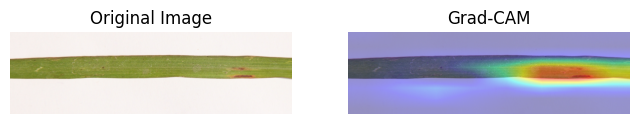

In [16]:
# Generate Grad-CAM heatmap
heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer)

# Display the heatmap on top of the original image
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    # Plot the result
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()

display_gradcam(img_path, heatmap)


In [17]:
img_path = '/content/drive/MyDrive/rice/test/dead_heart/106209.jpg'
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)


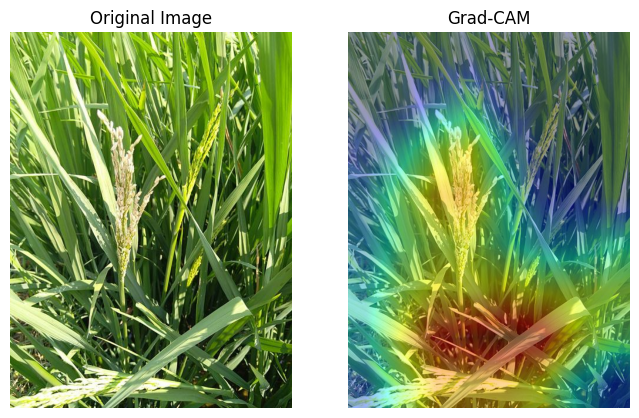

In [18]:
# Generate Grad-CAM heatmap
heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer)

# Display the heatmap on top of the original image
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    # Plot the result
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()

display_gradcam(img_path, heatmap)


In [19]:
img_path = '/content/drive/MyDrive/rice/test/hispa/105601.jpg'
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)


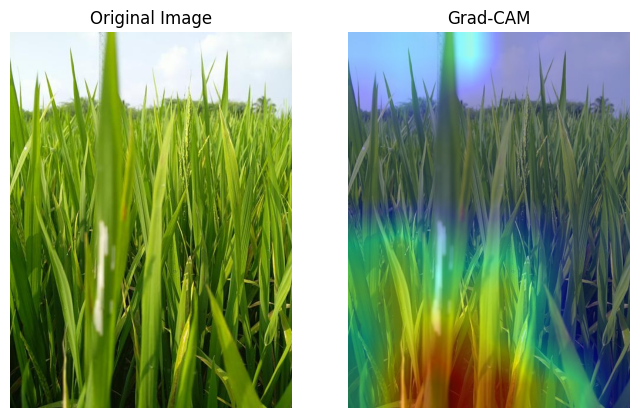

In [20]:
# Generate Grad-CAM heatmap
heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer)

# Display the heatmap on top of the original image
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    # Plot the result
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()

display_gradcam(img_path, heatmap)


In [21]:
img_path = '/content/drive/MyDrive/rice/test/downy_mildew/100019.jpg'
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)


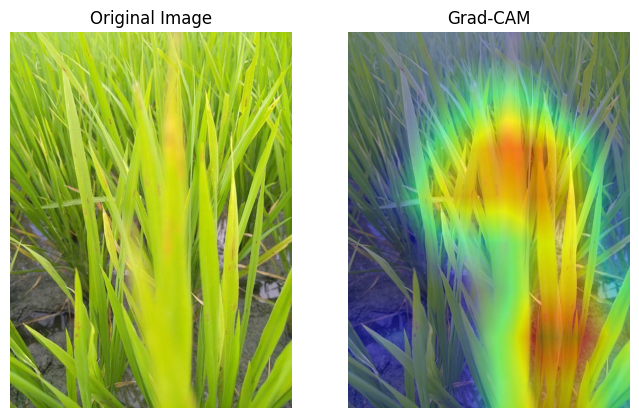

In [22]:
# Generate Grad-CAM heatmap
heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer)

# Display the heatmap on top of the original image
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    # Plot the result
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()

display_gradcam(img_path, heatmap)


In [23]:
img_path = '/content/drive/MyDrive/rice/test/tungro/107793.jpg'
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)


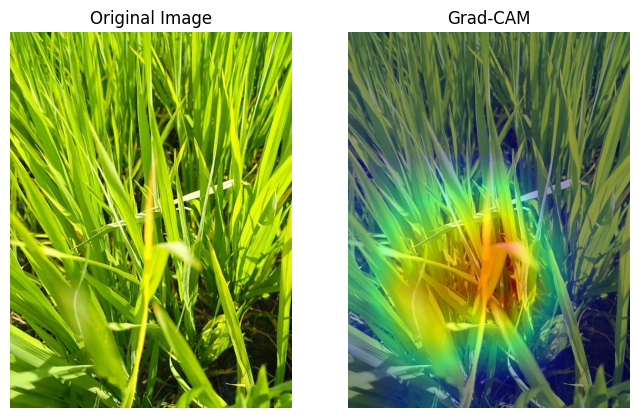

In [24]:
# Generate Grad-CAM heatmap
heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer)

# Display the heatmap on top of the original image
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    # Plot the result
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()

display_gradcam(img_path, heatmap)


In [27]:
img_path = '/content/drive/MyDrive/rice/test/normal/107480.jpg'
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)


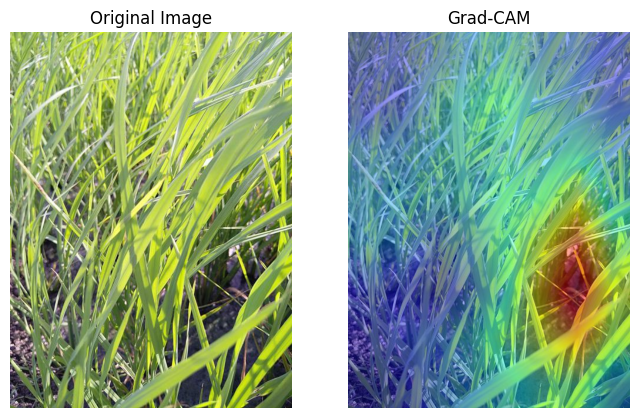

In [28]:
# Generate Grad-CAM heatmap
heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer)

# Display the heatmap on top of the original image
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    # Plot the result
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()

display_gradcam(img_path, heatmap)


In [29]:
img_path = '/content/drive/MyDrive/rice/test/bacterial_panicle_blight/100071.jpg'
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)


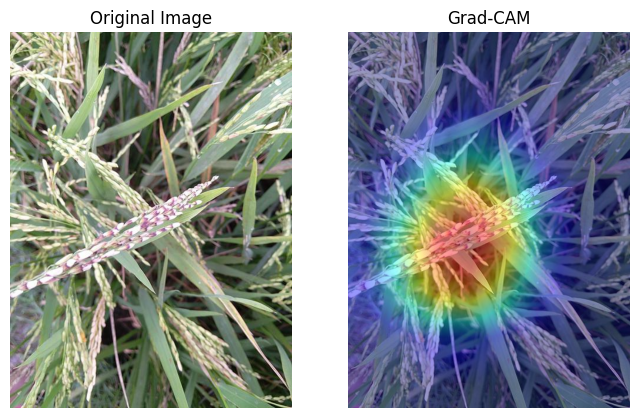

In [30]:
# Generate Grad-CAM heatmap
heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer)

# Display the heatmap on top of the original image
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    # Plot the result
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()

display_gradcam(img_path, heatmap)


In [31]:
img_path = '/content/drive/MyDrive/rice/test/bacterial_leaf_streak/100150.jpg'
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)


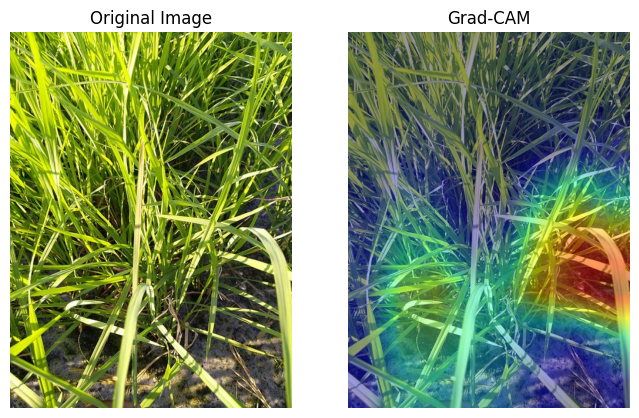

In [32]:
# Generate Grad-CAM heatmap
heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer)

# Display the heatmap on top of the original image
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    # Plot the result
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()

display_gradcam(img_path, heatmap)


In [33]:
img_path = '/content/drive/MyDrive/rice/test/rice_sheath_blight/1698288662.jpg'
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.inception_v3.preprocess_input(img_array)


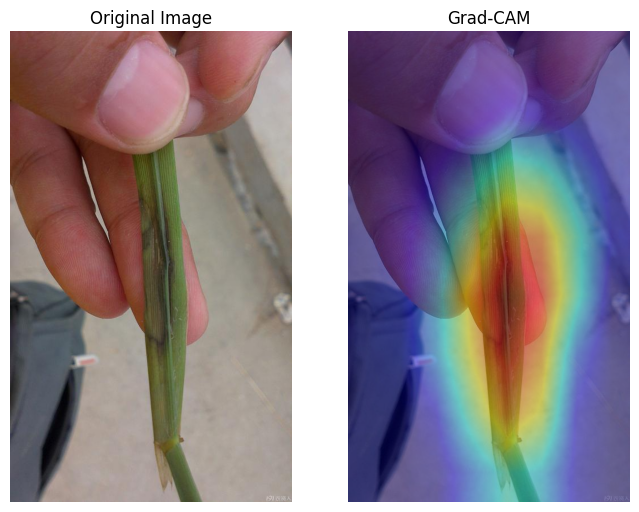

In [34]:
# Generate Grad-CAM heatmap
heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer)

# Display the heatmap on top of the original image
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(img, 1 - alpha, heatmap, alpha, 0)

    # Plot the result
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlayed_img, cv2.COLOR_BGR2RGB))
    plt.title('Grad-CAM')
    plt.axis('off')
    plt.show()

display_gradcam(img_path, heatmap)
